# Students Performance
## by Abraam Emad

## Preliminary Wrangling

> This document explores a dataset containing performance and attributes for 1,000 student.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load data and print out a few lines.
students_df = pd.read_csv("StudentsPerformance.csv")
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# number of columns in dataset
students_df.shape

(1000, 8)

In [4]:
# some info of columns in dataset
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# description of the dataset
students_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# duplicate rows in the dataset
students_df.duplicated().sum()

0

In [7]:
# features with missing values
students_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# what those unique values are and counts
students_df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# datatypes of columns
students_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
# values of parental level of education
students_df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
# values of Race/Ethnicity
students_df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
# create a new variable that express the total performance of the three subjects
students_df["overall"]=(students_df["math score"]+students_df["writing score"]+students_df["reading score"])/3

In [13]:
# round the overall
students_df['overall'] = students_df['overall'].round(decimals=0)
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


### What is the structure of your dataset?
In this dataset, Explore the performance of students and what is the correlation between it and the other attributes.

Attributes:

- Gender: Male / Female.
- Race/Ethnicity: 'group A', 'group B', 'group C', 'group D', 'group E'.
- Parental Level of Education: 'bachelor's degree', 'some college', "master's degree", "associate's degree", 'high school', 'some high school'.
- Lunch: standard / free/reduced.	
- Test Preparation Course: completed / none.
- Math Score: Score of the student in Mathematics.
- Reading Score: Score of the student in Reading.
- Writing Score: Score of the student in Writing.
- overall: The overall score of the three subjects

### What is/are the main feature(s) of interest in your dataset?

The main features are Math, Reading, Writing and overall.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the remainder features support the investigation.

## Univariate Exploration

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>,
        <AxesSubplot:title={'center':'overall'}>]], dtype=object)

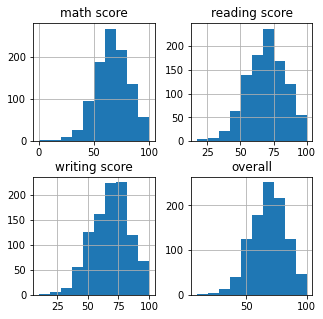

In [14]:
students_df.hist(figsize=(5,5))

I think that shapes follow normal distribution

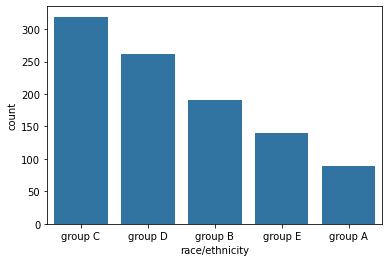

In [15]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]
# Dynamic-ordering the bars
# Count the frequency of each unique value in the 'race/ethnicity' column, and sort it in descending order
# Returns a Series
freq = students_df['race/ethnicity'].value_counts()

# Get the indexes of the Series
group_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `race/ethnicity`
sb.countplot(data=students_df, x='race/ethnicity', color=base_color, order=group_order);

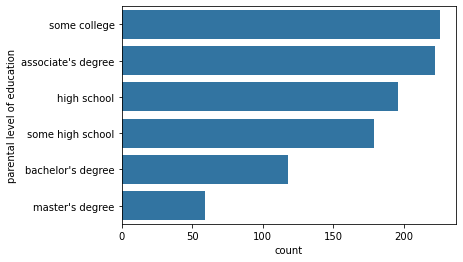

In [16]:
# Plot the parental level of education on a Horizontal bar chart
edu_level_order = students_df['parental level of education'].value_counts().index
sb.countplot(data=students_df, y='parental level of education', color=base_color, order=edu_level_order);

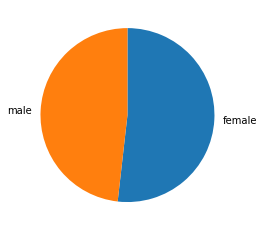

In [17]:
# Use pie chart in gender
sorted_counts = students_df.gender.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

In [18]:
# percentage of students that males
students_df[students_df['gender'] == 'male'].shape[0] / students_df.shape[0]

0.482

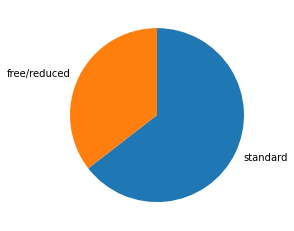

In [19]:
# Use pie chart in lunch
sorted_counts = students_df.lunch.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

In [20]:
# percentage of students that lunch is standard
students_df[students_df['lunch'] == 'standard'].shape[0] / students_df.shape[0]

0.645

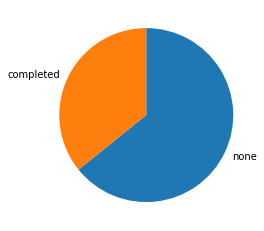

In [21]:
# Use pie chart in test preparation course
sorted_counts = students_df['test preparation course'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

In [22]:
# percentage of students that complete test preparation course
students_df[students_df['test preparation course'] == 'completed'].shape[0] / students_df.shape[0]

0.358

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


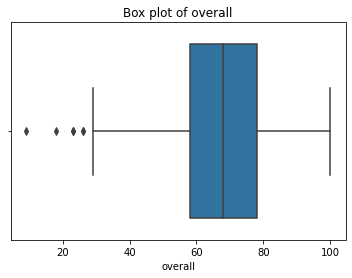

In [23]:
# use box plot of overall
sb.boxplot(students_df["overall"])
plt.title("Box plot of overall")
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Most of students performance betwwen 60-80 and there's some students low of 30.
- Most of students have parental level of education of some college.
- 51.8% Students are Female and 48.2% Students are Male.
- Most of the Students are From Group C.
- 35.8% Studends are completed the test preparation course.
- 64.5% Studends had a standard lunch.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- No there is no unusual points because it is usual to be students lower than the average or failed

## Bivariate Exploration

Text(0, 0.5, 'Writing Score')

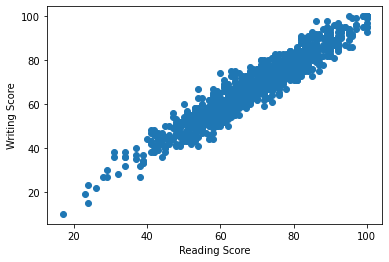

In [24]:
# Scatter plot betwwen reading and writing score.
plt.scatter(data = students_df, x = 'reading score', y = 'writing score');
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

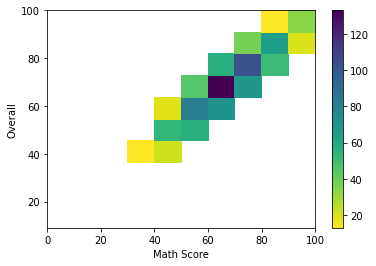

In [25]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
plt.hist2d(data = students_df, x = 'math score', y = 'overall', cmin=10, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Math Score')
plt.ylabel('Overall');

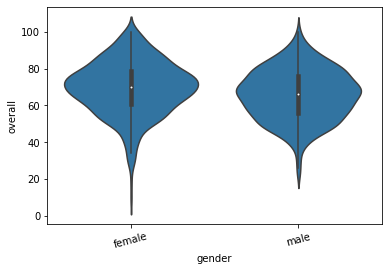

In [26]:
# Use violinplot in gender and overall
base_color = sb.color_palette()[0]
sb.violinplot(data=students_df, x='gender', y='overall', color=base_color, innner=None)
plt.xticks(rotation=15);

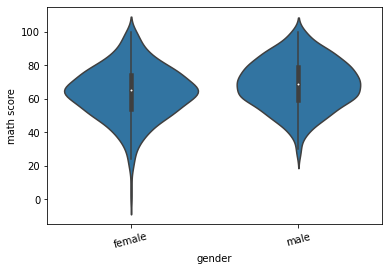

In [27]:
# Use violinplot in gender and math score
sb.violinplot(data=students_df, x='gender', y='math score', color=base_color, innner=None)
plt.xticks(rotation=15);

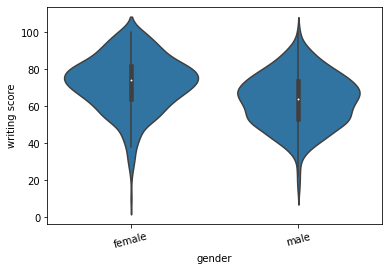

In [28]:
# Use violinplot in gender and writing score
sb.violinplot(data=students_df, x='gender', y='writing score', color=base_color, innner=None)
plt.xticks(rotation=15);

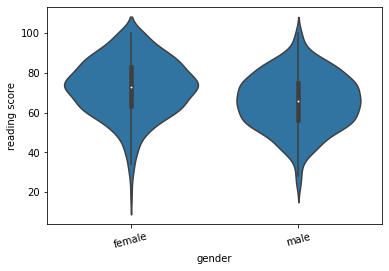

In [29]:
# Use violinplot in gender and reading score
sb.violinplot(data=students_df, x='gender', y='reading score', color=base_color, innner=None)
plt.xticks(rotation=15);

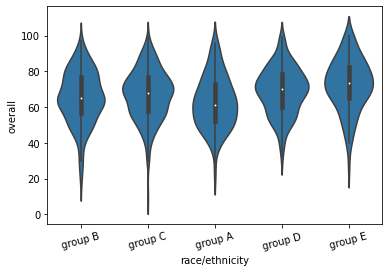

In [30]:
# Use violinplot in groups and overall score
sb.violinplot(data=students_df, x='race/ethnicity', y='overall', color=base_color, innner=None)
plt.xticks(rotation=15);

<AxesSubplot:xlabel='overall', ylabel='parental level of education'>

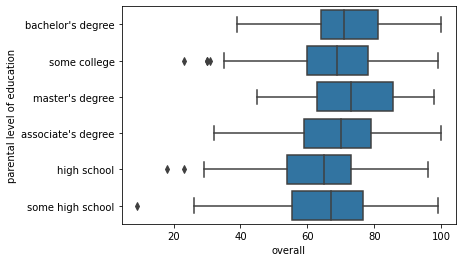

In [31]:
# Use boxplots in parental level of education and overall
sb.boxplot(data=students_df, y='parental level of education', x='overall', color=base_color)

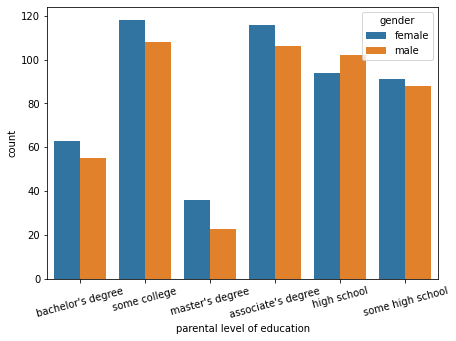

In [32]:
# Use boxplots in parental level of education and gendeer
plt.figure(figsize=(7,5))
sb.countplot(data = students_df, x = 'parental level of education', hue = 'gender')
plt.xticks(rotation=15);

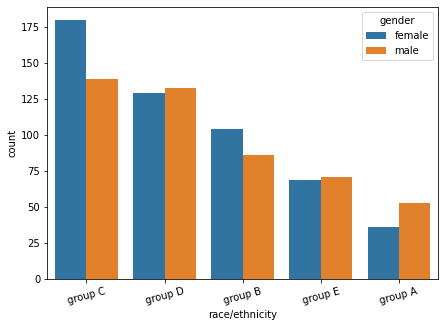

In [33]:
plt.figure(figsize=(7,5))
# Dynamic-ordering the bars
# Count the frequency of each unique value in the 'race/ethnicity' column, and sort it in descending order
# Returns a Series
freq = students_df['race/ethnicity'].value_counts()
# Get the indexes of the Series
group_order = freq.index
sb.countplot(data = students_df, x = 'race/ethnicity', hue = 'gender', order=group_order)
plt.xticks(rotation=15);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is correlation betwwen reading and writing score.
- There is correlation betwwen overall and math score.
- In Average the overall is similar between males and females.
- In Average females higher than males in writing and reading but males higher in math.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- In the Most Parental level of education females more than males except high school.
- In Group B and Group C females more than males. 

## Multivariate Exploration

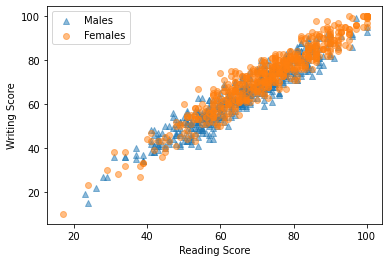

In [34]:
# plot gender, reading and writing score
gender_markers = [['male', '^'],
               ['female', 'o']]

for gen, marker in gender_markers:
    df_gender = students_df[students_df['gender'] == gen]
    plt.scatter(data = df_gender, x = 'reading score', y = 'writing score', marker = marker, alpha = .5)
plt.legend(['Males','Females'])
plt.xlabel('Reading Score')
plt.ylabel('Writing Score');

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


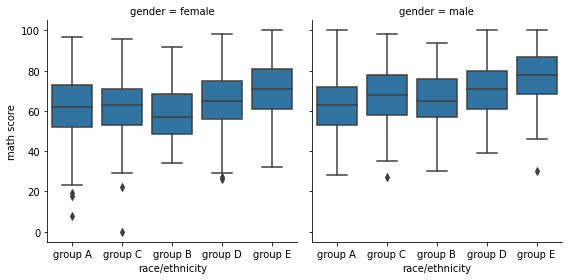

In [35]:
# plot gender, groups and math score
g = sb.FacetGrid(data = students_df, col = 'gender', size = 4)
g.map(sb.boxplot, 'race/ethnicity', 'math score')

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


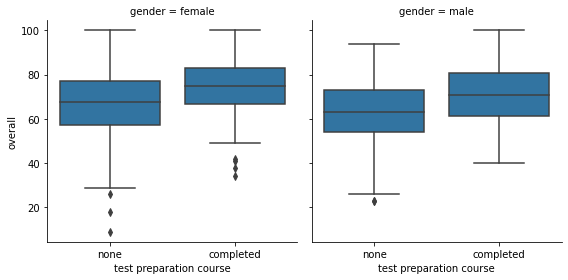

In [36]:
# plot gender, test preparation course and overall score
g = sb.FacetGrid(data = students_df, col = 'gender', size = 4)
g.map(sb.boxplot, 'test preparation course', 'overall')

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


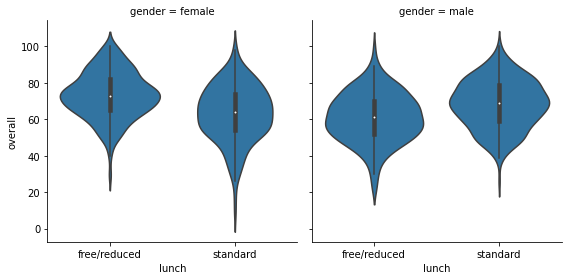

In [37]:
# plot gender, lunch and overall score
g = sb.FacetGrid(data = students_df, col = 'gender', size = 4)
g.map(sb.violinplot, 'lunch', 'overall')

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


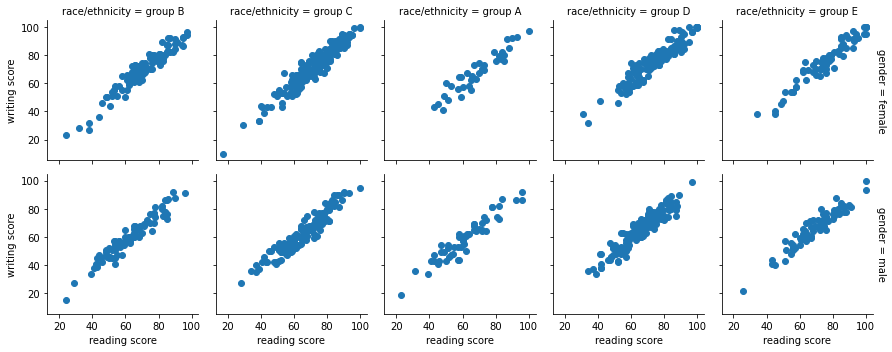

In [38]:
# plot gender, groups, reading and writing score
g = sb.FacetGrid(data = students_df, col = 'race/ethnicity', row = 'gender', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'reading score', 'writing score')

C:\Users\Abraam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


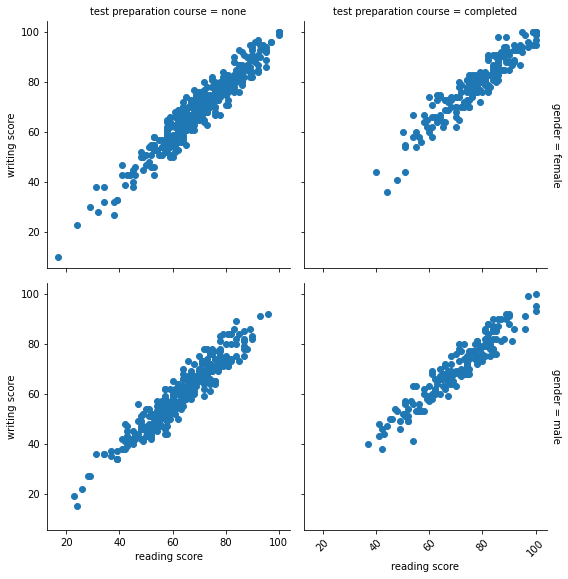

In [39]:
# plot gender, test preparation course, reading and writing score
g = sb.FacetGrid(data = students_df, col = 'test preparation course', row = 'gender', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'reading score', 'writing score')
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Females hrigher than males in reading and writing.
- In all group in average males higher than females in math.
- Females that didn't complete test preparation course in average higher than males in overall performance but in average males and females that complete test preparation course higher than thay didb't complete.
- In Average males had standard lunch higher than others in overall but females had standard lunch less than others in overall.
- In all groups females higher than males in reading and writing scores but still correlation betwwen them.
- Males and females that's complete test preparation course higher than they didn't complete it in reading and average.

### Were there any interesting or surprising interactions between features?

- No there are surprising interactions between features. except that there are females completed test preparation course and has score less than 50.